<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg", align="left">
</div>
<div style="float: right; width: 50%;">
<p style="margin: 0; padding-top: 22px; text-align:right;">M2.851 · Tipología y ciclo de vida de los datos · PRAC 2</p>
<p style="margin: 0; text-align:right;">2018-2 · Máster universitario en Ciencia de datos (Data science)</p>
<p style="margin: 0; text-align:right; padding-button: 100px;">Estudios de Informática, Multimedia y Telecomunicación</p>
</div>
</div>
<div style="width:100%;">&nbsp;</div>


# PRAC 2: Limpieza.

En esta práctica se elabora un caso práctico orientado a aprender a identificar los datos relevantes para un proyecto analítico y usar las herramientas de integración, limpieza, validación y análisis de las mismas.

<ol start="1">
  <li>Descripción del dataset.</li>
  <li>Integración y selección de los datos de interés a analizar.</li>
  <li>Limpieza de los datos.</li>
  <li>Análisis de los datos.</li>
  <li>Representación de los resultados a partir de tablas y gráficas.</li>
  <li>Resolución del problema.</li>
</ol>

Importamos las librerías necesarias:

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

## Descripción del dataset

- Carga de los datos.

In [2]:
# Cargamos los datos
train = pd.read_csv('train.csv')
test= pd.read_csv('test.csv')

- Primer vistazo al conjunto de datos

In [3]:
# Mostramos información relativa al dataset train.
print('- \'train\' es del tipo: ',type(train))
print('- Las dimensiones de \'train\' son: ', train.shape)
print('- Las primeras 5 filas de \'train\' son:')
train.head(5)

- 'train' es del tipo:  <class 'pandas.core.frame.DataFrame'>
- Las dimensiones de 'train' son:  (891, 12)
- Las primeras 5 filas de 'train' son:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Mostramos información relativa al dataset test.
print('- \'test\' es del tipo: ',type(test))
print('- Las dimensiones de \'test\' son: ', test.shape)
print('- Las primeras 5 filas de \'test\' son:')
test.head(5)

- 'test' es del tipo:  <class 'pandas.core.frame.DataFrame'>
- Las dimensiones de 'test' son:  (418, 11)
- Las primeras 5 filas de 'test' son:


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Como podemos observar, tenemos una dimensión menos en el conjunto de test, más concretamente se trata de la columna *Survived*.

- Unificar formatos

Con las dos cabeceras anteriores podemos ver que las diferentes dimensiones tienen el mismo formato en ambos conjuntos a fusionar. Por ejemplo, para la columna *Sex* tenemos que en ambos casos pone *male* para los hombres y *famale* para las mujeres en vez de *H* y *M* o algo por el estilo. Lo mismo pasa para el precio de los billetes, que se encuentran en la misma moneda. De no ser así, habría que unificar formatos al hacer la fusión, pero en este caso no existe ese problema.

- Descripción del origen de los datos

Los datos han sido descargados directamente del enlace que se muestra más abajo y que forma parte de una competición para la que se aporta además del conjunto de train y test un conjunto de datos llamado **gender_submission.csv** que no vamos a usar dado que sólo indica el formato en el que quiere la competición que demos respuesta a la pregunta que se realiza.

https://www.kaggle.com/c/titanic/data

- Descripción de las dimensiones

Las dimensiones que tiene nuestro conjunto de datos el siguiente:

**PassengerId**: Identificador del pasajero. Número entero incremental.

**Pclass**: Primera, segunda o tercera clase. Número entero.

**Name**: Nombre del pasajero.

**Sex**: Género del pasajero. Masculino / femenino.

**Age**: Edad del pasajero. Número con decimales.

**Sibsp**: Número de hermanos o cónyuges abordo del Titanic. Número entero.

**Parch**: Número de padres o hermanos abordo del Titanic. Número entero.

**Ticket**: Número del ticket. Char.

**Fare**: Tarifa del pase. Número con decimales.

**Cabin**: Número de la cabina. Char.

**Embarked**: Puerto de embarque. Char.

Además, tenemos una columna que hace referencia a los pasajeros que han sobrevivido, pero solo en el conjunto de train.

**Survival**: Indica mediante valores booleanos si el pasajero ha sobrevivido o no.

**NOTA**: Vamos a usar *PassengerId* como Primary key, pero para eso, vamos a asegurarnos de que realmente es un primary key y que no tiene valores repetidos.


- ¿Por qué es importante y qué pregunta/problema pretende responder?

Tener limpia esta base de datos da lugar a poder predecir los perfiles de pasajeros que pudieron sobrevivir mediante técnicas de minería. El objetivo es poder predecir si un cierto perfil sobreviviría en la catástrofe del titanic o no.

Además, aunque en la competición de Kaggle se suponga que se ha realizado adecuadamente la división del conjunto train y test, podemos comprobar que efectivamente la división en ambos conjuntos no esté sesgado y sea aleatoria.

## Integración y selección de los datos de interés a analizar.

- Integración -> Fusión de los datos.

In [5]:
# Dado que nos interesa limpiar los datos, los vamos a juntar en un único DataFrame.
frame = [train, test]
data = pd.concat(frame)

In [6]:
# Mostramos información relativa al dataset.
print('- \'data\' es del tipo: ',type(data))
print('- Las dimensiones de \'data\' son: ', data.shape)
print('- Las primeras 5 filas de \'data\' son:')
data.head(5)

- 'data' es del tipo:  <class 'pandas.core.frame.DataFrame'>
- Las dimensiones de 'data' son:  (1309, 12)
- Las primeras 5 filas de 'data' son:


,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


- Integración -> Identificador único.

En éste apartado vamos a comprobar que tal y como parece, la dimensión PassengerID sea un identificador único:

In [7]:
copia_id = data['PassengerId'].tolist()
if len(set(copia_id)) == len(copia_id):
    respuesta_1 = True
else:
    respuesta_1 = False
print('¿Todos los valores de PassengerId son únicos? --> ', respuesta_1)
id_bueno = [i for  i in range(1,len(data) + 1)]
respuesta_2 = (copia_id == id_bueno)
print('¿Todos los valores de PassengerId son números crecientes sin espacios secuenciales? --> ', respuesta_2)

¿Todos los valores de PassengerId son únicos? -->  True
¿Todos los valores de PassengerId son números crecientes sin espacios secuenciales? -->  True


- Selección -> Filtrado.

En un principio no nos interesa realizar ningún tipo de filtrado por ningún valor o valores concretos de ninguna dimensión, de ser así, siempre existe la posibilidad de realizar dicha reducción en el procesamiento de los datos, sin ser necesaria su realización en esta etapa de preprocesado.

- Selección -> Nuevas variables.

In [56]:
# Atributo que dice si un pasajero tiene una cabina en el Titanic
data['Con_Cabina'] = data["Cabin"].apply(lambda x: 0 if type(x) == float else 1)

# Atributo que especifica el tamaño total de la familia.
data['TamanioFamilia'] = data['SibSp'] + data['Parch'] + 1

# Atributo que especifica el título del pasajero.
def titulo(name):
    titulo = re.search(' ([A-Za-z]+)\.', name)
    if titulo:
        return titulo.group(1)
    return ""
## Aplicamos la función
data['Titulo'] = data['Name'].apply(titulo)
## Aglutinamos los títulos.
data['Titulo'] = data['Titulo'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Otros')
## Ya que nos ponemos a crear, vamos a hacerlo sin que dos clases iguales aparezcan distinto.
data['Titulo'] = data['Titulo'].replace(['Mlle','Ms'] , 'Miss')
data['Titulo'] = data['Titulo'].replace('Mme', 'Mrs')

# Visualizamos las nuevas columnas
data.head(5)

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Con_Cabina,TamanioFamilia,Titulo
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,0,2,Mr
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,1,2,Mrs
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,0,1,Miss
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,1,2,Mrs
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,0,1,Mr


- Selección -> Screening o exploración de los datos.

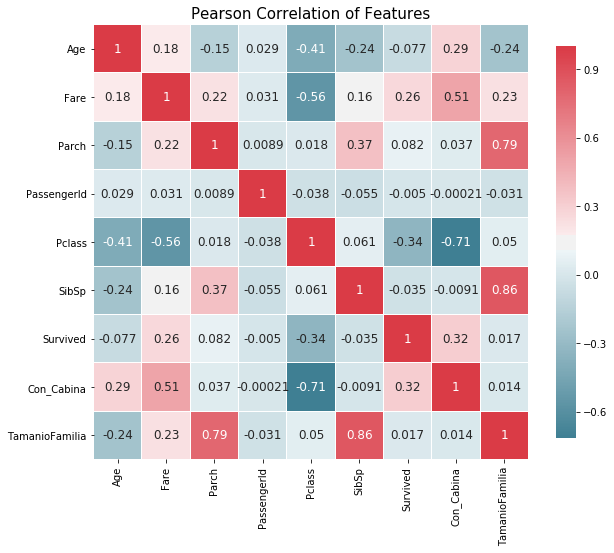

In [57]:
%matplotlib inline
#correlation heatmap of dataset
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(10, 8))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', size=15)

correlation_heatmap(data)

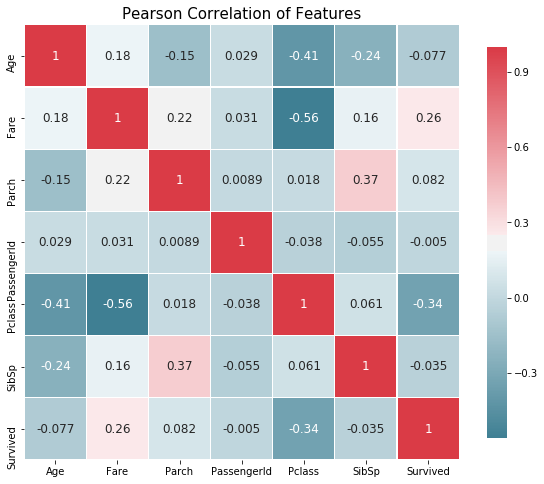

In [28]:
%matplotlib inline
#correlation heatmap of dataset
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(10, 8))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', size=15)

correlation_heatmap(data)

## Limpieza de los datos.

## Análisis de los datos.

## Representación de los resultados a partir de tablas y gráficas.

## Resolución del problema.